## NYC Stop and Frisk: predictors of outcomes

<img src="https://i1.wp.com/www.nationalreview.com/wp-content/uploads/2018/01/new-york-city-stop-and-frisk-crime-decline-conservatives-wrong-1.jpg?fit=789%2C460&ssl=1" width=500x>

---

NYC's *Stop, Question, and Frisk* is a program/practice by the New York Police Department in which officers approach, temporarily detain, and (in some cases) frisk civilians on the street for weapons or contraband.  The program's implementation has been highly controversial with accusations of racial profiling and bias, and in 2013 a US federal judge found that the program had been carried out in a way that violated the US Constitution.  Using publicly available Stop and Frisk [data](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page), in this assignment you will expore the ability of Random Forest models to predict whether, for those stops in which a suspect was suspected of having a weapon, a weapon is likely to have been found (an analysis related to the one carried out in [Goel, Rao, & Shroff, 2016](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-10/issue-1/Precinct-or-prejudice-Understanding-racial-disparities-in-New-York-Citys/10.1214/15-AOAS897.full)).

---

#New York Stop and Frisk Program and dataset:

The stop-and-frisk program was implemented by the New York City Police Department in 2002 in response to a rise in crime. The program allowed officers to stop and frisk people on the street randomly without any need for search warrant or any cause, which led to millions of stops over the years. While the program was intended to reduce crime, it was criticized of race discrimination.

Many people argued that the program mainly targeted black and Hispanic individuals, leading to a reduce in trust between law enforcement and these communities. Studies also suggested that the program did not significantly reduce crime and may have even contributed to an increase in crime rates.

In 2013, a federal judge ruled that the program was unconstitutional, because of its race discrimination. Since then, the NYPD has made changes to the program, but it remains a source of tension between law enforcement and the communities they serve.

The stop-and-frisk program generated a vast amount of data on the individuals who were stopped and frisked.

The goal of this part of the assignment is to build a model that uses several features of the stops in which the subject was suspected of carrying a weapon to predict whether a weapon was actually found.



### **Part 1 - Loading and Cleaning data**

In [ ]:
# all imports required for this Assignment

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Read in the 2010 stop and frisk data from  `mlpp23/data/stop_and_frisk/` into a DataFrame called `sqf` setting `low_memory=False` in `pd.read_csv`.**

In [ ]:
# import the dataset
sqf = pd.read_csv('/content/drive/MyDrive/2010.csv', low_memory=False)

In [ ]:
# list of all variables present in the dataframe
list(sqf.columns)

['year',
 'pct',
 'ser_num',
 'datestop',
 'timestop',
 'recstat',
 'inout',
 'trhsloc',
 'perobs',
 'crimsusp',
 'perstop',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'arstoffn',
 'sumissue',
 'sumoffen',
 'compyear',
 'comppct',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'adtlrept',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'machgun',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'repcmd',
 'revcmd',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'sex',
 'rac

In the Columns, Period of Observation signifies the month, of the stop and frisk incident happened. But not Year and date.

 But as we will be doing onehot encoding, I have just taken the period of observation, which has the number of the month.

In [ ]:
req_columns = [
                'perobs', # the period of the observation(month number),
                'inout', # stop was made inside or outside(O = outside, I = inside)
                'sex',       # subject's sex ('M', 'F', 'z')
                'age',       # subject's age (in years)

                'race',       # subject's race B-Black, W-White, Q - Asian,
                              #  P - Pacific Islander, A - American Indian or Alaska Native,
                              #  Z - Two or more races, U - Unknown, I - Not reported

                # columns indicating that a weapon was found on the subject, N -> No, Y -> Yes
                'contrabn', # was contraband found on the subject, contraband also includes guns
                'pistol', # pistol was found
                'riflshot',  # rifle found on subject
                'asltweap',  # assault weapon found on subject
                'knifcuti',  #  knife or cutting instrument was found
                'machgun',   # machine gun was found
                'othrweap',  # other weapon was found

                # columns related to wether the subject was suspected of carrying a weapon
                'rf_othsw',  # other suspicion of weapons
                'cs_objcs',  # carrying suspicious objects
                'cs_bulge',  # suspicious bulge
                'sb_hdobj',  # suspected for hard object
                'sb_outln',  # suspected for outline of weapon
                'rf_bulg',  # reason for frisk - suspicious bulge
              ]

In [ ]:
# taking only columns required for our task
sqf = sqf[req_columns]

In [ ]:
sqf

,perobs,inout,sex,age,race,contrabn,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,rf_othsw,cs_objcs,cs_bulge,sb_hdobj,sb_outln,rf_bulg
0,1,O,M,17,B,N,N,N,N,N,N,N,N,N,N,N,N,N
1,2,O,M,20,P,N,N,N,N,N,N,N,N,N,N,N,N,N
2,1,I,M,55,Q,N,N,N,N,N,N,N,Y,N,N,Y,N,N
3,5,O,M,17,Q,N,N,N,N,N,N,N,N,N,N,N,N,N
4,1,O,M,55,B,N,N,N,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601280,1,O,M,19,Q,N,N,N,N,N,N,N,N,N,N,N,N,N
601281,1,O,M,20,B,N,N,N,N,N,N,N,N,N,N,N,N,N
601282,1,O,M,31,B,N,N,N,N,N,N,N,N,N,N,N,N,N
601283,1,O,F,23,B,N,N,N,N,N,N,N,N,N,N,N,N,N


In [ ]:
def get_sqf_categorical_col_names():
  """ return the column names containing categorical variables """

  categorical_cols_list = []

  for col_name in sqf.columns:
    unique_vals = sqf[col_name].unique()
    if len(unique_vals) == 2:
      categorical_cols_list.append(col_name)
      print(col_name, unique_vals)

  return categorical_cols_list

In [ ]:
categorical_cols_list = get_sqf_categorical_col_names()

inout ['O' 'I']
contrabn ['N' 'Y']
pistol ['N' 'Y']
riflshot ['N' 'Y']
asltweap ['N' 'Y']
knifcuti ['N' 'Y']
machgun ['N' 'Y']
othrweap ['N' 'Y']
rf_othsw ['N' 'Y']
cs_objcs ['N' 'Y']
cs_bulge ['N' 'Y']
sb_hdobj ['N' 'Y']
sb_outln ['N' 'Y']
rf_bulg ['N' 'Y']


In [ ]:
# replacing the categorical columns binary values to 0 or 1

sqf[categorical_cols_list] = sqf[categorical_cols_list].replace({'N': 0, 'Y':1, 'O':0, 'I':1})

In [ ]:

categorical_cols_list = get_sqf_categorical_col_names()

inout [1 0]
contrabn [0 1]
pistol [0 1]
riflshot [0 1]
asltweap [0 1]
knifcuti [0 1]
machgun [0 1]
othrweap [0 1]
rf_othsw [1 0]
cs_objcs [0 1]
cs_bulge [0 1]
sb_hdobj [1 0]
sb_outln [0 1]
rf_bulg [0 1]


In [ ]:
# after replacing categorical variables to '0' and '1'
sqf

,perobs,inout,sex,age,race,contrabn,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,rf_othsw,cs_objcs,cs_bulge,sb_hdobj,sb_outln,rf_bulg
2,1,1,M,55,Q,0,0,0,0,0,0,0,1,0,0,1,0,0
5,5,1,M,57,Q,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,M,18,B,0,0,0,0,0,0,0,0,0,1,0,0,1
13,4,1,M,63,B,0,0,0,0,0,0,0,0,1,0,0,0,0
15,1,1,M,19,Z,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601274,1,0,M,27,A,0,0,0,0,0,0,0,0,0,0,1,0,0
601276,1,0,M,19,B,0,0,0,0,0,0,0,0,0,0,1,0,0
601277,1,0,M,17,Q,0,0,0,0,0,0,0,0,0,0,1,0,0
601278,1,1,M,17,Q,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# rows indicating person is suspected of carrying a weapon.
weapon_suspect_cols = [
                      'rf_othsw',
                      'cs_objcs',
                      'cs_bulge',
                      'sb_hdobj',
                      'sb_outln',
                      'rf_bulg',
                      ]

In [ ]:
sqf = sqf[sqf[weapon_suspect_cols].isin([1]).any(axis=1)]

In [ ]:
sqf

,perobs,inout,sex,age,race,contrabn,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,rf_othsw,cs_objcs,cs_bulge,sb_hdobj,sb_outln,rf_bulg
2,1,1,M,55,Q,0,0,0,0,0,0,0,1,0,0,1,0,0
5,5,1,M,57,Q,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,M,18,B,0,0,0,0,0,0,0,0,0,1,0,0,1
13,4,1,M,63,B,0,0,0,0,0,0,0,0,1,0,0,0,0
15,1,1,M,19,Z,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601274,1,0,M,27,A,0,0,0,0,0,0,0,0,0,0,1,0,0
601276,1,0,M,19,B,0,0,0,0,0,0,0,0,0,0,1,0,0
601277,1,0,M,17,Q,0,0,0,0,0,0,0,0,0,0,1,0,0
601278,1,1,M,17,Q,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
weapon_fnd_col_names = [
                        'contrabn',
                        'pistol',
                        'riflshot',
                        'asltweap',
                        'knifcuti',
                        'machgun',
                        'othrweap',
                        ]

In [ ]:
sqf.columns

Index(['perobs', 'inout', 'sex', 'age', 'race', 'contrabn', 'pistol',
       'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'rf_othsw',
       'cs_objcs', 'cs_bulge', 'sb_hdobj', 'sb_outln', 'rf_bulg'],
      dtype='object')

In [ ]:
# created 'weapon_fnd' column to denote if a weapon is found with suspect.
# weapon_fnd contains values as '0' or '1'

sqf['weapon_fnd'] = sqf[weapon_fnd_col_names].any(axis=1).astype(int)

In [ ]:
sqf['weapon_fnd'].value_counts()

0    104220
1     10779
Name: weapon_fnd, dtype: int64

In [ ]:
sqf['weapon_fnd'].value_counts()

0    104220
1     10779
Name: weapon_fnd, dtype: int64

In [ ]:
print('cs_bulge')
print(sqf['cs_bulge'].value_counts())
print('*'*10, '\n rf_bulge')
print(sqf['rf_bulg'].value_counts())

cs_bulge
0    62905
1    52094
Name: cs_bulge, dtype: int64
********** 
 rf_bulge
0    65692
1    49307
Name: rf_bulg, dtype: int64


I have tried to include all the columns related to suspicion of weapons like both cs_bulge, and rf_bulge, as they both columns contain different values.

we can infer from the 'weapon_fnd' column:
when The NYPD has suspected totally 104220 times for carrying a weapon,
the weapon was found only 10779 times. i.e only around 10 percent of the times, Police has suspected correctly.

In [ ]:
sqf['weapon_fnd'].value_counts()

0    104220
1     10779
Name: weapon_fnd, dtype: int64

we can observe that the dataset is not balanced.

There are 10779 rows with weapon_fnd values as 1 and there are 104220 rows indicating the weapon_fnd values as 0.

So, we will do Undersampling by randomly selecting the 10779 rows containing weapon_fnd == 0 values.

In [ ]:
# divide the dataset into two parts:
# one containing the rows, where the suspect posses a weapon
# other contains the rows, where the suspect does not posses a weapon

weapon_fnd = sqf[sqf['weapon_fnd'] == 1]
weapon_nt_fnd = sqf[sqf['weapon_fnd'] == 0]

In [ ]:
# randomly selecting the 5667(suspects posses weapon) number of rows from the
# 'weapon_nt_fnd' dataset, to balance the sqf dataset

weapon_nt_fnd_sub = weapon_nt_fnd.sample(len(weapon_fnd), random_state=213)

In [ ]:
# now combine both of the datasets, which forms a balanced dataset
sqf_bal = pd.concat((weapon_nt_fnd_sub, weapon_fnd))

In [ ]:
sqf_bal['weapon_fnd'].value_counts()

0    10779
1    10779
Name: weapon_fnd, dtype: int64

we can observe the data set is balanced as there are same number of rows belonging to both of the target classes.

### **Part 3 - Fitting Tree-based Classifier Models**

The goal of this part of the assignment is to build a model that uses several features of the stops in which the subject was suspected of carrying a weapon to predict whether a weapon was actually found.

In [ ]:
sqf_bal.columns

Index(['perobs', 'inout', 'sex', 'age', 'race', 'contrabn', 'pistol',
       'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'rf_othsw',
       'cs_objcs', 'cs_bulge', 'sb_hdobj', 'sb_outln', 'rf_bulg',
       'weapon_fnd'],
      dtype='object')

In [ ]:
features_cols = ['perobs', 'inout', 'sex', 'age', 'race']

features = sqf_bal[features_cols]
features = pd.get_dummies(features)
target = sqf_bal['weapon_fnd']

In [ ]:
features

,perobs,inout,age,sex_F,sex_M,sex_Z,race_A,race_B,race_I,race_P,race_Q,race_U,race_W,race_Z
331252,3,0,20,0,1,0,0,0,0,0,1,0,0,0
74213,1,0,25,0,1,0,0,1,0,0,0,0,0,0
514381,3,1,31,0,1,0,0,1,0,0,0,0,0,0
336302,1,0,26,0,1,0,0,0,0,0,1,0,0,0
514371,2,0,33,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600972,1,1,19,0,1,0,0,1,0,0,0,0,0,0
600975,1,0,16,0,1,0,0,0,0,0,1,0,0,0
600976,1,0,19,0,1,0,0,0,0,0,1,0,0,0
601036,2,0,22,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
target

331252    0
74213     0
514381    0
336302    0
514371    0
         ..
600972    1
600975    1
600976    1
601036    1
601205    1
Name: weapon_fnd, Length: 21558, dtype: int32

In [ ]:
# split the dataset to use 20 percent of the data for testing.

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=302)

In [ ]:
train_features

,perobs,inout,age,sex_F,sex_M,sex_Z,race_A,race_B,race_I,race_P,race_Q,race_U,race_W,race_Z
398683,1,0,38,0,1,0,0,1,0,0,0,0,0,0
350305,1,0,32,0,1,0,0,1,0,0,0,0,0,0
311720,1,0,16,0,1,0,0,0,0,0,0,0,0,1
272890,1,0,44,0,1,0,0,0,0,1,0,0,0,0
532913,2,0,33,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543967,1,0,33,0,1,0,0,0,0,0,1,0,0,0
404620,1,0,20,0,1,0,0,1,0,0,0,0,0,0
284817,5,0,53,0,1,0,0,1,0,0,0,0,0,0
257816,1,0,25,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
test_features.columns

Index(['perobs', 'inout', 'age', 'sex_F', 'sex_M', 'sex_Z', 'race_A', 'race_B',
       'race_I', 'race_P', 'race_Q', 'race_U', 'race_W', 'race_Z'],
      dtype='object')

In [ ]:
test_target.value_counts()

0    2166
1    2146
Name: weapon_fnd, dtype: int64

In [ ]:
train_target.value_counts()

1    8633
0    8613
Name: weapon_fnd, dtype: int64

**Fitting the `RandomForestClassifier**

In [ ]:
# initialize a RandomForest Classifier with default hyperparameters

rf_classifier = RandomForestClassifier()
rf_classifier.fit(train_features, train_target)

train_predict = rf_classifier.predict(train_features)
train_accuracy = accuracy_score(train_target, train_predict)
print('training accuracy = {:0.2f}'.format(train_accuracy))

test_predict = rf_classifier.predict(test_features)
test_accuracy = accuracy_score(test_target, test_predict)
print('testing accuracy = {:0.3f}'.format(test_accuracy))

training accuracy = 0.67
testing accuracy = 0.569


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for test data
test_precision = precision_score(y_true=test_target, y_pred=test_predict)
test_recall = recall_score(y_true=test_target, y_pred=test_predict)
test_f1_score = f1_score(y_true=test_target, y_pred=test_predict)

print('Test Precision: {:.3f}'.format(test_precision))
print('Test Recall: {:.3f}'.format(test_recall))
print('Test F1-score: {:.3f}'.format(test_f1_score))


Test Precision: 0.583
Test Recall: 0.468
Test F1-score: 0.519


Both the Traning and Testing accuracies are very low, it states that maybe the input features, we have taken for analysis are not sufficient to predict the target.

The Testing Accuracy is low compared to Training Accuracy, because of the Model Overfitting on the Train data. With the Hyper Parameter Tuning, we will reduce the overfit of the models.

The test precision is 0.583, indicating that when the model predicts a positive class, it is correct 58.3% of the time.
The test recall is 0.468, indicating that the model correctly identifies 46.8% of the positive cases.
The test F1-score is 0.519, which is a weighted average of precision and recall, and provides a balanced assessment of the model's performance on both positive and negative classes.

**Tune the `min_samples_leaf` hyperparameter using Grid Search with Cross Validation and we will check the resultant model accuracy.**


The min_samples_leaf hyperparameter in a random forest is the minimum number of samples that must be present in a leaf node. This hyperparameter helps to prevent overfitting by preventing the model from creating small leaf nodes.

In [ ]:
# finding the best 'min_samples_leaf' hyperparameter for the RandomForestClassifier
#  model using GridSearchCV with cross validation as 10 Folds.

param_grid = {
    'min_samples_leaf': [1, 2, 5, 8, 10, 20, 25, 30, 50, 80, 100, 150],
}

rfc_tune = RandomForestClassifier()
rfc_cv_tune = GridSearchCV(rfc_tune, param_grid, cv=10)
rfc_cv_tune.fit(train_features, train_target)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 5, 8, 10, 20, 25, 30, 50,
                                              80, 100, 150]})

In [ ]:
# the optimal number of min_samples_leaf
rfc_cv_tune.best_params_['min_samples_leaf']

25

In [ ]:
# Training the RandomForestClassifier model with the obtained optimal 'min_samples_leaf' hyperparameter.

rfc = RandomForestClassifier(min_samples_leaf=rfc_cv_tune.best_params_['min_samples_leaf'])
rfc.fit(train_features, train_target)

train_predict = rfc.predict(train_features)
train_accuracy = accuracy_score(train_target, train_predict)
print('training accuracy = {:0.2f}'.format(train_accuracy))

test_predict = rfc.predict(test_features)
test_accuracy = accuracy_score(test_target, test_predict)
print('testing accuracy = {:0.2f}'.format(test_accuracy))

training accuracy = 0.61
testing accuracy = 0.59


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for test data
test_precision = precision_score(y_true=test_target, y_pred=test_predict)
test_recall = recall_score(y_true=test_target, y_pred=test_predict)
test_f1_score = f1_score(y_true=test_target, y_pred=test_predict)

print('Test Precision: {:.3f}'.format(test_precision))
print('Test Recall: {:.3f}'.format(test_recall))
print('Test F1-score: {:.3f}'.format(test_f1_score))

Test Precision: 0.613
Test Recall: 0.471
Test F1-score: 0.533


This model also did'nt perform well as the both training and testing accuracies were very less, this is also maybe because of the lack of important informative features required for the prediction of finding a weapon.

The Overfit of the model is reduced because of the 'min_samples_leaf' hyperparameter tuning.

The test precision is 0.613, which is slightly higher than the previous model, indicating that the model is slightly better at predicting positive cases.
The test recall is 0.471, which is similar to the previous model, indicating that the model correctly identifies about the same proportion of positive cases.
The test F1-score is 0.533, which is slightly higher than the previous model, indicating that the model is slightly better at providing a balanced assessment of performance on both positive and negative classes.

### **Part 4 - Fitting Tree-based Regression Models**

In this part, we will be extending our modeling to include predictions of *probabilities* that a weapon was found given your features using tree-based regression models.

**Fit a Random Forest *Regressor* to the data (being sure to tune `min_samples_leaf` with Grid Search).**

In [ ]:
# find the optimal 'min_samples_leaf' hyperparameter for RandomForestRegressor
# using GridSearchCV and 10 folds cross validation.

param_grid = {
    'min_samples_leaf': [1, 2, 5, 8, 10, 20, 25, 30, 50, 80, 100, 150],
}

rfr_tune = RandomForestRegressor()
rfr_cv_tune = GridSearchCV(rfr_tune, param_grid, cv=10)
rfr_cv_tune.fit(train_features, train_target)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 5, 8, 10, 20, 25, 30, 50,
                                              80, 100, 150]})

In [ ]:
rfc_cv_tune.best_params_['min_samples_leaf']

25

In [ ]:
# train the RandomForestRegressor model with optimal 'min_samples_leaf' hyperparameter.

rfr = RandomForestRegressor(min_samples_leaf=rfc_cv_tune.best_params_['min_samples_leaf'])
rfr.fit(train_features, train_target)

test_predict = rfr.predict(test_features)

In [ ]:
test_features.shape

(4312, 14)

In [ ]:
len(test_predict)

4312

In [ ]:
test_predict

array([0.37879866, 0.87414902, 0.38839743, ..., 0.44223645, 0.44522128,
       0.52238069])

In [ ]:
white_indices = np.where(test_features['race_W'] == 1)[0]
black_indices = np.where(test_features['race_B'] == 1)[0]

In [ ]:
print('white race count', len(white_indices))
print('black race count', len(black_indices))

white race count 401
black race count 2242


**With this Random Forest Regressor, we can interpret the prediction of the model as the probability that a weapon would be found given the features.  Make a histogram (`range` of 0 to 1 and 30 bins) of the predictions of this model using the subset of the testing data for which the subject's race was white and another histogram using the subset of the testing data for which the subject's race was black.**

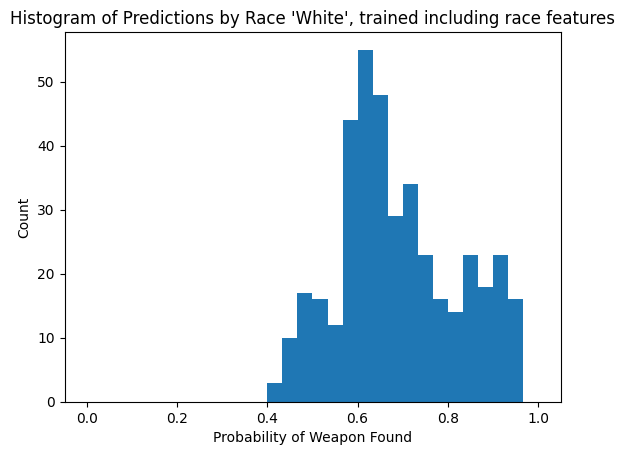

In [ ]:
# subjects race is white

white_predictions = np.array(test_predict[white_indices])

plt.hist(white_predictions, bins=30, range=(0, 1))
plt.title("Histogram of Predictions by Race 'White', trained including race features")
plt.xlabel('Probability of Weapon Found')
plt.ylabel('Count')
plt.show()

In [ ]:
white_predictions.mean()

0.6914738311571021

For the above white plot, the higher mean probability and greater number of values with probability greater than 0.5 suggest that the model using race as an input feature is more confident in predicting the presence of a weapon for white suspects. This could have potential implications for racial bias in law enforcement if the model is used in practice.

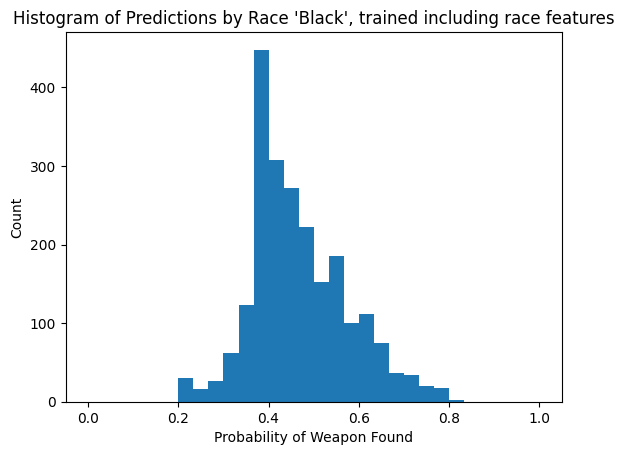

In [ ]:
# subjects race is black

black_predictions = np.array(test_predict[black_indices])

plt.hist(black_predictions, bins=30, range=(0, 1))
plt.title("Histogram of Predictions by Race 'Black', trained including race features")
plt.xlabel('Probability of Weapon Found')
plt.ylabel('Count')
plt.show()

In [ ]:
black_predictions.mean()

0.46672803337942764

For this plot, the lower mean probability and fewer values with probability greater than 0.5, compared to the above histogram with white people suggests that the model using race as an input feature is less confident in predicting the presence of a weapon for black suspects. This could also have potential implications for racial bias in law enforcement if the model is used in practice, as it could result in lower rates of identifying weapons on black suspects compared to white suspects.

In [ ]:
# Calculate mean absolute error
mae = mean_absolute_error(test_target, test_predict)
print("Mean Absolute Error:", mae)

# Calculate mean squared error
mse = mean_squared_error(test_target, test_predict)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R2 score
r2 = r2_score(test_target, test_predict)
print("R2 Score:", r2)

Mean Absolute Error: 0.4730024509472705
Mean Squared Error: 0.23969681582280927
Root Mean Squared Error: 0.48958841471465525
R2 Score: 0.04119210980291532


**Repeating the above (fit a Random Forest Regressor and plot histograms of the predictions of the subsets of the test data for which the subject was white and black) but *removing the subject's race as a feature on which the model is fit*.**

In [ ]:
race_columns = ['race_A', 'race_B', 'race_I', 'race_P', 'race_Q', 'race_U', 'race_W', 'race_Z']

train_features.drop(columns=race_columns, inplace=True)
test_features.drop(columns=race_columns, inplace=True)

In [ ]:
print('train features', list(train_features.columns))
print('test features',  list(test_features.columns))

train features ['perobs', 'inout', 'age', 'sex_F', 'sex_M', 'sex_Z']
test features ['perobs', 'inout', 'age', 'sex_F', 'sex_M', 'sex_Z']


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_leaf': [1, 2, 5, 8, 10, 20, 25, 30, 50, 80, 100, 150],
}

rfr_tune = RandomForestRegressor()
rfr_cv_tune = GridSearchCV(rfr_tune, param_grid, cv=10)
rfr_cv_tune.fit(train_features, train_target)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 5, 8, 10, 20, 25, 30, 50,
                                              80, 100, 150]})

In [ ]:
rfr_cv_tune.best_params_

{'min_samples_leaf': 150}

In [ ]:
rfr = RandomForestRegressor(min_samples_leaf=rfr_cv_tune.best_params_['min_samples_leaf'])
rfr.fit(train_features, train_target)

test_predict = rfr.predict(test_features)

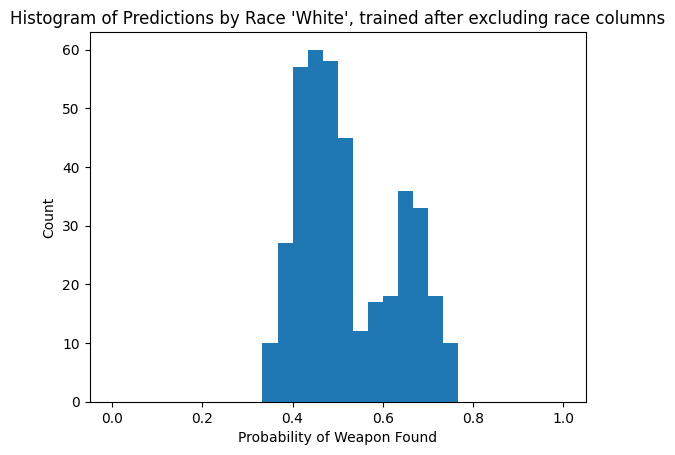

In [ ]:
import matplotlib.pyplot as plt

white_predictions = test_predict[white_indices]

plt.hist(white_predictions, bins=30, range=(0, 1))
plt.title("Histogram of Predictions by Race 'White', trained after excluding race columns")
plt.xlabel('Probability of Weapon Found')
plt.ylabel('Count')
plt.show()

In [ ]:
white_predictions.mean()

0.5238305668965983

for this plot, which are predicted from the model trained after removing the race as an input feature, we can observe that the number of probability values which are higher than 0.5 are less and all of the values are concentrated around the mean probability of 0.52. We can infer from the above plot that there is an uncertainity to predict more number of probability values greater than 0.5, for the white race people.

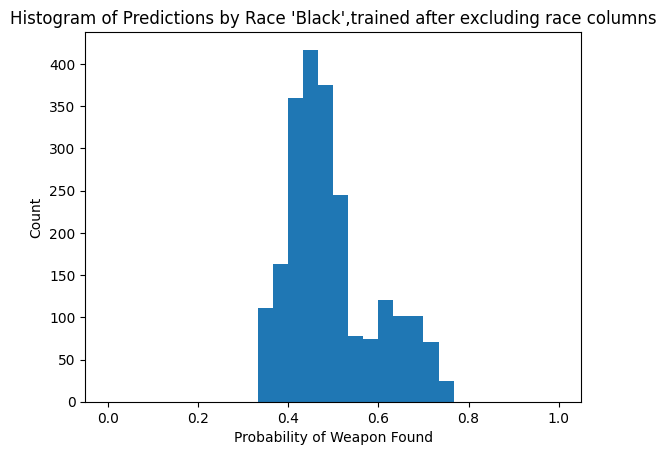

In [ ]:
import matplotlib.pyplot as plt

black_predictions = test_predict[black_indices]

plt.hist(black_predictions, bins=30, range=(0, 1))
plt.title("Histogram of Predictions by Race 'Black',trained after excluding race columns")
plt.xlabel('Probability of Weapon Found')
plt.ylabel('Count')
plt.show()

In [ ]:
black_predictions.mean()

0.49650497304662067

In [ ]:
black_predictions.min()

0.3444773405814503

In [ ]:
black_predictions.max()

0.7524273990013222

we can observe for the black people, the model trained without race features has more probability values centered around the mean of 0.4965 with minimum of 0.344 and a maximum of 0.752, which means if we remove the race as the input feature, the model is not sure to predict if a person posses a weapon or not based on the given columns

For the histograms that include race as an input feature, we can see that the model is more confident in predicting the presence of a weapon for white suspects, as the mean probability and the number of values with probability greater than 0.5 are higher for the white race. On the other hand, for black suspects, the model is less confident in predicting the presence of a weapon, as the mean probability and the number of values with probability greater than 0.5 are lower.

However, after removing the race as an input feature, we can observe that the number of probability values greater than 0.5 is less for white suspects, which suggests that there is uncertainty in predicting more values with high probability. For black suspects, the model is not sure in predicting the presence of a weapon, also removing race as a feature from the model did not have a significant impact on the distribution of predicted probabilities for black suspects.

For white suspects, the model predicted a mean probability of 0.7 before removing the race columns and 0.52, with fewer values greater than 0.5 after removing the race columns. For black suspects, the model predicted a mean probability of 0.4965 with a wider range of values, suggesting that the model is not sure if a person has a weapon or not based on the given columns.

 Overall, removing the race feature resulted in less confidence in the model's ability to predict the presence of a weapon for both white and black suspects.

Based on the histograms and the probability cutoff of 0.5, we can observe that the model using race as an input feature tends to have a higher mean probability and a greater number of values with probability greater than 0.5 for white suspects, suggesting that the model is more confident in predicting the presence of a weapon for them. However, for black suspects, the model using race as an input feature has a lower mean probability and fewer values with probability greater than 0.5, indicating that the model is less confident in predicting the presence of a weapon for them.

On the other hand, when the race column is removed as an input feature, the model seems to be less accurate overall, as indicated by the higher mean absolute error, higher mean squared error, higher root mean squared error, and lower R2 score. However, it seems to produce more balanced and consistent predictions across all races, as indicated by the more similar shapes and ranges of the histograms for white and black suspects.

After observing all the four histograms, we can say that race may be also a good feature to consider as there are changes in the histograms before and after removing the race feature from the training dataset. But the model trained on race column as feature is predicting some information saying the white suspects possess weapons than the black suspects. Whereas, after removing the race feature, there are approx, equal number of probabilities below and above 0.5. making difficult to interpret.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate mean absolute error
mae = mean_absolute_error(test_target, test_predict)
print("Mean Absolute Error:", mae)

# Calculate mean squared error
mse = mean_squared_error(test_target, test_predict)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R2 score
r2 = r2_score(test_target, test_predict)
print("R2 Score:", r2)

Mean Absolute Error: 0.48236324414852544
Mean Squared Error: 0.24209536119263203
Root Mean Squared Error: 0.4920318700985049
R2 Score: 0.03159772191884025


From these metrics, we can see that there is not much difference between the model's performance before and after removing the race columns. The model's performance has only slightly degraded after removing the race columns, as indicated by the slightly higher values of Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and slightly lower R2 Score.

This suggests that the race feature might not have a significant impact on the model's performance in predicting the outcome variable.